## Klimadynamics 1

#### Nils, Nastaran and Rovina

1. Write a program, that evaluates a bivariate Gaussian PDF $ f(\vec{x}; \mu, \Sigma) $ with given parameters $ \vec{\mu} $ and $ \Sigma $ on a regular 2-dimensional grid
   * Define the covariance matrix, $ \Sigma $ by its variance $ \sigma_{1} $ and $ \sigma_ {2} $, and correlation, $ \rho $  
   * Apply this $ f(\vec{x}) $ to a mesh-grid with range: 
       $ x_{1} = (-3\sigma_{1},\cdots,3\sigma_{1}) $ and $ x_{2} = (-3\sigma_{2},\cdots,3\sigma_{2}) $
   * Plot a contour plot with axes $ x_{1}, x_{2} $
   
Note: $ \Sigma = \begin{pmatrix} \sigma^{2}_{1} & \sigma_{12} \\ \sigma_{21} & \sigma_{2}^2 \end{pmatrix} $ and $ \rho $ = $ \frac{\sigma_{12}}{\sigma_{1}*\sigma_{2}} $
     where, $ \rho \in (-1,1) $  

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as mv_norm
from numpy.linalg import det, inv, eig

In [19]:
def get_multivariate_normal(x, mean, cov):
    """
    mean : 1-D array_like, of length N

    Mean of the N-dimensional distribution.

    cov : 2-D array_like, of shape (N, N)

    Covariance matrix of the distribution. Ref lecture notes eq 55
    """

    q = mean.shape[0]

    Z = np.sqrt((2*np.pi)**q*det(cov))

    dist = 1/Z * np.exp(-0.5*(x-mean).T @ inv(cov)@(x-mean))

    return dist
 

In [20]:
sigma_1 = 5
sigma_2 = 1
rho = -0.8 

mean = np.array([0, 0])

cov = np.array([[sigma_1**2, rho*sigma_1*sigma_2], 
                [rho*sigma_1*sigma_2, sigma_2**2]])

In [21]:
# get values from multivariate normal distribution
x_norm = get_multivariate_normal(x=np.array([0, 1]), mean=mean, cov=cov)

x1 = np.linspace(-3*sigma_1, 3*sigma_1, 100)
x2 = np.linspace(-3*sigma_2, 3*sigma_2, 100)

In [22]:
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
    
prob = np.zeros(shape=x1_mesh.shape)
for i in range(prob.shape[0]):
    for j in range(prob.shape[1]):

        prob[i, j] = get_multivariate_normal(x=np.array([x1_mesh[i, j], x2_mesh[i, j]]), mean=mean, cov=cov)

In [ ]:
# prob = np.apply_along_axis(func, 0, np.array[mesh], mu,sigma) ---> vectorize it intead of the for loop

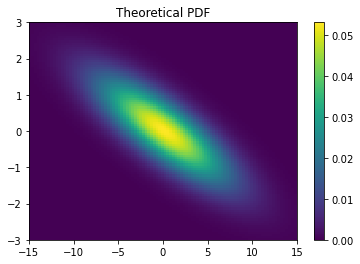

In [23]:
plt.pcolormesh(x1, x2, prob)  
plt.colorbar()
plt.title("Theoretical PDF")
plt.show()

2. Use the same values for $ \vec{\mu} $ and $ \Sigma $ as above to compare the estimated PDF and the theoretical PDF. To generate a sample of a bivariate RV with $ \vec{\mu} $ and $ \Sigma $ proceed as follows:
    1. Calculate eigenvectors $ \vec{e}_i $ and eigenvalues $ \lambda_{i} $,(i= 1,2).
    2. Generate using a function that draws from a univariate normal distribution, a sample of size $ \textit{m} $ of $ a^{X}_{i} $,(i= 1,2). This forms a matrix $ \mathbf{A} $ with realizations $ \vec{a}^{X^{k}} $, $k= 1,\cdots,m$ as columns, i.g. a $ 2 \times m $ matrix.
    3. The sample of $ \vec{X} $ is the given as $ \mathbf{X}$ = $ \mathbf{E} \mathbf{A}  + \vec{\mu}$
    4. Use sample of size $ \textit{m} $ to plot a 2-dimensional histogram and compare with PDF of 1.
    
 * $ \mathbf{A} $ = $ \begin{pmatrix} a_1^{x(1)} & a_1^{x(m)} \\ a_2^{x(1)} & a_2^{x(m)} \end{pmatrix} $
 * $ \mathbf{E}$ = $ (\vec{e}_1, \cdots, \vec{e}_q) $ 
 * $ \Lambda $ = $ (\lambda_1, \cdots, \lambda_q) $

In [7]:
def get_multivariate_normal_transformed(a_x, a_mu, lbd_mat):
    """
    Gaussian multivariate PDF (transformed on orthonormal basis)
    
    a_x:        array with factors of elements of random variable (dim: q)
    a_mu:       array with factors of mean of random variable (dim: q)
    lbd_mat:    matrix with eigenvalues on diagonal (dim: q x q)
    """
    
    q = lbd_mat.shape[0]
    
    Z = np.sqrt((2*np.pi)**q*det(lbd_mat))
    
    prob = 1/Z * np.exp(-0.5*(a_x - a_mu).T @ inv(lbd_mat) @ (a_x - a_mu))
    
    #di = np.diag_indices(q)
    #np.prod(1/np.sqrt(2*np.pi*lbd_mat[di])*np.exp(-0.5*(a_x - a_mu)**2/lbd_mat[di]))
    
    return prob


In [8]:
L , E = eig(cov)
lbd_mat = np.diag(np.array([L[0], L[1]])) #contructing a diagonal matrix with the eigen values

In [9]:
a_mu = E.T @ mean 

In [10]:
m = 20000000 # the number of independent samples we wish to draw

In [11]:
a_x1 = np.random.normal(loc=a_mu[0], scale=np.sqrt(L[0]), size=m)
a_x2 = np.random.normal(loc=a_mu[1], scale=np.sqrt(L[1]), size=m)

In [12]:
A = np.array([a_x1, a_x2])

In [13]:
X =  E @ A
x1 = X[0, :]
x2 = X[1, :]
print(X.shape)

(2, 20000000)


In [14]:
# calculate probability density using
# a: the independent sample on the orthonormal basis
# b: the dependent sample in the original data space
if False:
    prob_a = np.zeros(shape=m)
    prob_b = np.zeros(shape=m)

    for i in range(m):
        prob_a[i] = get_multivariate_normal_transformed(a_x=np.array([a_x1[i], a_x2[i]]), a_mu=a_mu, lbd_mat=lbd_mat)
        prob_test[i] = get_multivariate_normal(x=np.array([x1[i], x2[i]]), mean=mean, cov=cov)

    assert (np.array(prob_a*1e15, dtype=np.int) == np.array(prob_b*1e15, dtype=np.int)).all  # should be the same (!)

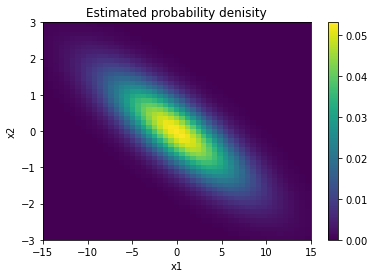

In [17]:
# plot in 2d     
X_grid = np.array([np.linspace(-3*sigma_1, 3*sigma_1, 50),  # x1
                   np.linspace(-3*sigma_2, 3*sigma_2, 50),  # x2
                  ])
fig = plt.figure()
ax = fig.add_subplot(111)
hs = ax.hist2d(X[0, :], X[1, :], bins=X_grid, cmap='viridis', density=True)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Estimated probability denisity')
fig.colorbar(hs[3])
plt.show()